In [1]:
import os
import pandas as pd
import datetime
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.font_manager import FontProperties
chinese_font = FontProperties(fname=r"C:\Windows\Fonts\STCAIYUN.TTF")
import seaborn as sns
import random
import plotly.express as px
from sklearn import preprocessing

In [2]:
chinese_font = FontProperties(fname=r"C:\Windows\Fonts\msyh.ttc")
colors = {
    'colors_hunli' : [(239/255, 214/255, 209/255), (196/255, 212/255, 202/255), (222/255, 233/255, 235/255)],
    'colors_meizi' : [(244/255/255, 231/255, 225/255), (240/255, 220/255, 221/255), (229/255, 194/255, 190/255), (206/255, 161/255, 168/255)],
    'colors_hailan' : [(223/255, 234/255, 250/255), (193/255, 217/255, 247/255), (105/255, 139/255, 184/255), (81/255, 109/255, 146/255)],
    'colors_chunri' : [(248/255, 202/255, 153/255), (247/255, 230/255, 116/255), (223/255, 229/255, 167/255), (224/255, 239/255, 234/255)],
    'colors_mocha' : [(187/255, 194/255, 163/255), (140/255, 177/255, 160/255), (115/255, 135/255, 110/255), (88/255, 111/255, 93/255)],
    'colors_haiyan' : [(220/255, 231/255, 249/255), (179/255, 216/255, 224/255), (203/255, 220/255, 210/255), (160/255, 205/255, 229/255)],
    'colors_monai' : [(168/255, 198/255, 206/255), (148/255, 194/255, 209/255), (114/255, 164/255, 191/255), (147/255, 164/255, 194/255)]
}

In [3]:
def helix_to_rgb(helix_color):
    r = int(helix_color[0:2], 16) / 255.0
    g = int(helix_color[2:4], 16) / 255.0
    b = int(helix_color[4:6], 16) / 255.0
    return (r, g, b)

# Example helix color
colors_helix = {
'purples' : ['D8C2CD', 'C0ADC6', 'AEA2C6', '9999C3','7882BB'],
'shuilian': ['A1AD7A','F8C76C','D88D7D','77A3A0','506159']
}

# Convert to RGB form
for name, color in colors_helix.items():
    for i, c in enumerate(color):
        color[i] = helix_to_rgb(c)

In [4]:
path = 'merged_data_with_star.csv'
df = pd.read_csv(path)

C:\Users\Eason\AppData\Local\Temp\ipykernel_5892\2186094720.py:2: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


In [5]:
df.head()

,cUid,cUname,cParentArea,cArea,type,sendDate,message,price,count,uid,time,hour,day,dayOfWeek,year,star
0,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319912043,wow有舰长,NaN,NaN,0,2023-07-03 01:45:12.043,1,3,1,2023,5.0
1,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319960241,[https://i0.hdslb.com/bfs/live/abedc05607b70a8...,NaN,NaN,0,2023-07-03 01:46:00.241,1,3,1,2023,2.0
2,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320090560,点播 触电,NaN,NaN,0,2023-07-03 01:48:10.560,1,3,1,2023,4.0
3,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320127436,[https://i0.hdslb.com/bfs/live/752c09547574aeb...,NaN,NaN,0,2023-07-03 01:48:47.436,1,3,1,2023,3.0
4,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320381467,有睫毛刷嘛,NaN,NaN,0,2023-07-03 01:53:01.467,1,3,1,2023,2.0


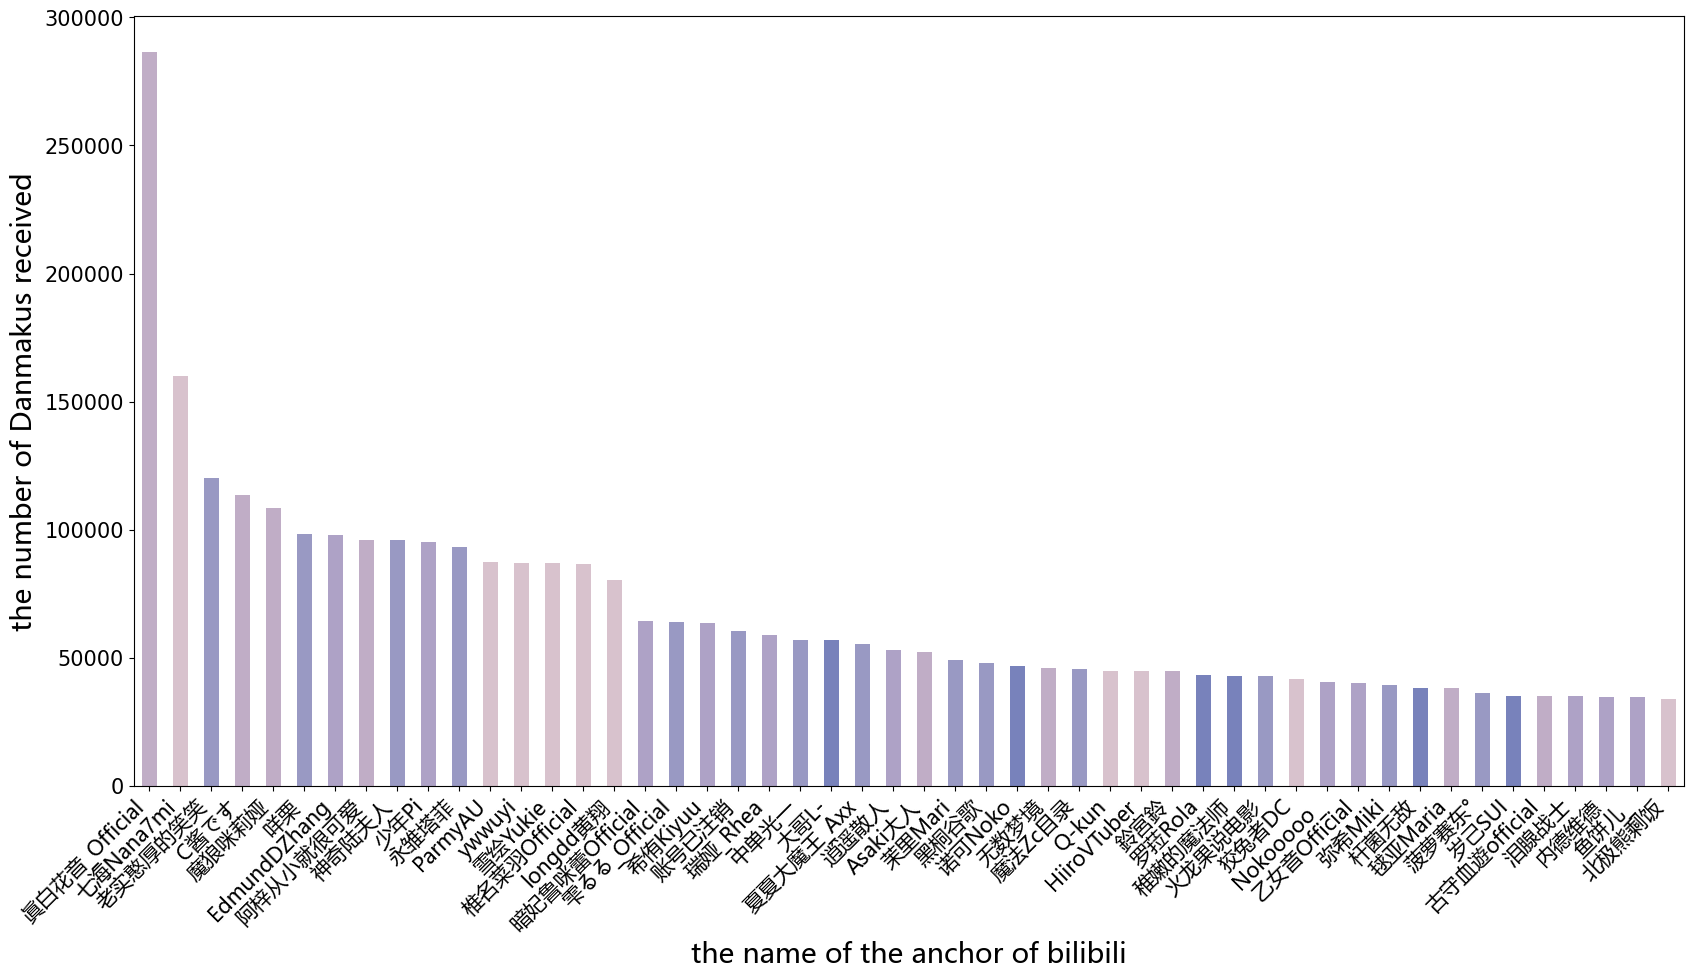

In [42]:
num = 50
data = df.cUname.value_counts()[:num]
coleurs = random.choices(colors_helix['purples'], k=50)
ax = data.plot(kind="bar", figsize=(20,10), fontsize=15, color=coleurs)
ax.set_xticklabels(data.index, fontproperties=chinese_font, fontsize=15, rotation=45, ha='right')
ax.set_xlabel('the name of the anchor of bilibili', fontsize=20, fontproperties=chinese_font)
ax.set_ylabel('the number of Danmakus received', fontsize=20, fontproperties=chinese_font)
# Show the plot
plt.show()

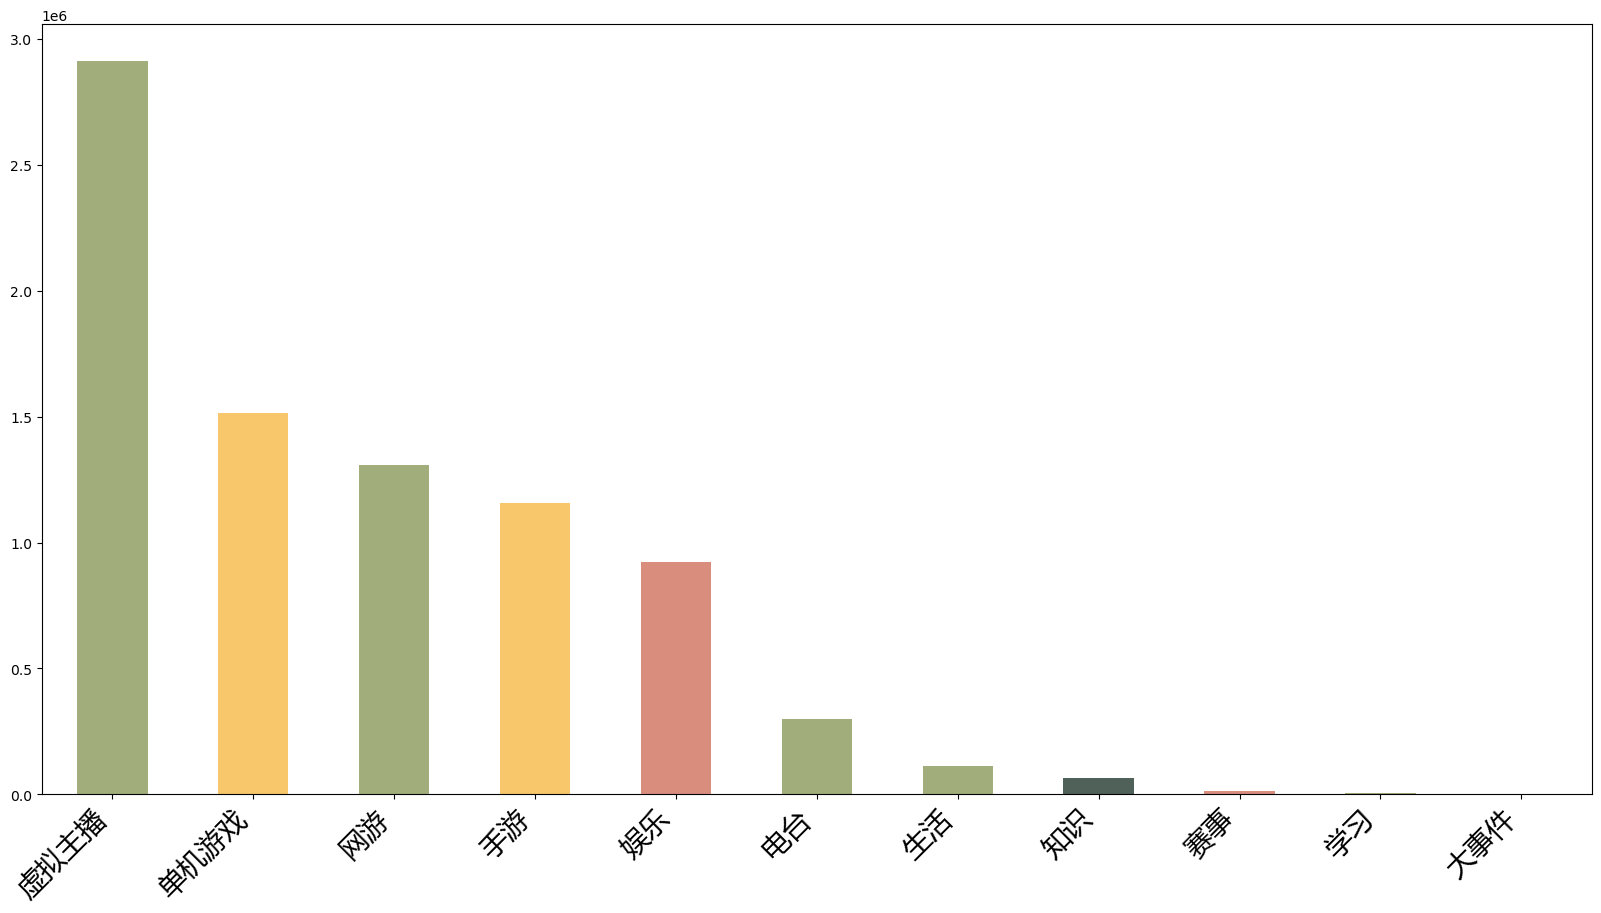

In [43]:
data = df.cParentArea.value_counts()
num = len(data)
coleurs = random.choices(colors_helix['shuilian'], k=num)
ax = data.plot(kind="bar", figsize=(20,10), color=coleurs)
ax.set_xticklabels(data.index, fontproperties=chinese_font, fontsize=20, rotation=45, ha='right')
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:e}"))
# Show the plot
plt.show()

In [8]:
data

虚拟主播    2913243
单机游戏    1516616
网游      1308710
手游      1156219
娱乐       923372
电台       300821
生活       112537
知识        62961
赛事        14840
学习         3269
大事件         685
Name: cParentArea, dtype: int64

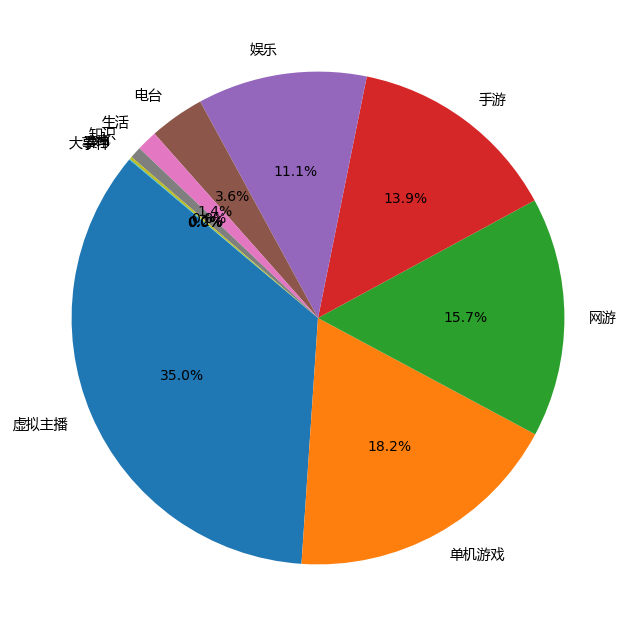

In [44]:
# data = data.sample(frac=1)
couleurs = colors_helix['purples']+colors['colors_mocha']+colors['colors_monai']
random.shuffle(couleurs)
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
pie_chart = plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
# Set the title
# plt.title('Pie Chart of a Pandas Series')
plt.setp(pie_chart[1], fontproperties=chinese_font)
# Show the plot
plt.show()


In [47]:
fig = px.funnel(data.sort_values(ascending=False))
fig.show()

NameError: name 'px' is not defined

### 处理时间

In [12]:
df['time'] = df['sendDate'].apply(lambda x : str(datetime.datetime.fromtimestamp(float(x) / 1000)))
df['time'] = pd.to_datetime(df['time'])

In [13]:
df['hour'] = df['time'].dt.hour
df['day'] = df['time'].dt.day
df['dayOfWeek'] = df['time'].dt.dayofweek + 1
df['year'] = df['time'].dt.year

In [14]:
df.head()

,cUid,cUname,cParentArea,cArea,type,sendDate,message,price,count,uid,time,hour,day,dayOfWeek,year
0,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319912043,wow有舰长,NaN,NaN,0,2023-07-03 01:45:12.043,1,3,1,2023
1,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319960241,[https://i0.hdslb.com/bfs/live/abedc05607b70a8...,NaN,NaN,0,2023-07-03 01:46:00.241,1,3,1,2023
2,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320090560,点播 触电,NaN,NaN,0,2023-07-03 01:48:10.560,1,3,1,2023
3,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320127436,[https://i0.hdslb.com/bfs/live/752c09547574aeb...,NaN,NaN,0,2023-07-03 01:48:47.436,1,3,1,2023
4,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320381467,有睫毛刷嘛,NaN,NaN,0,2023-07-03 01:53:01.467,1,3,1,2023


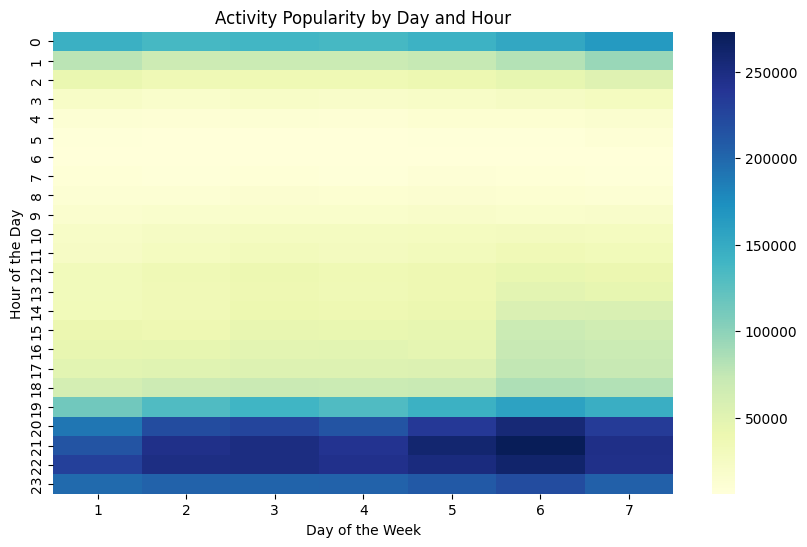

In [15]:
#按星期几
pivot_table = df.pivot_table(index='hour', columns='dayOfWeek', aggfunc='size')

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.heatmap(data=pivot_table, cmap='YlGnBu', fmt="d")

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.title('Activity Popularity by Day and Hour')

# Show the plot
plt.show()

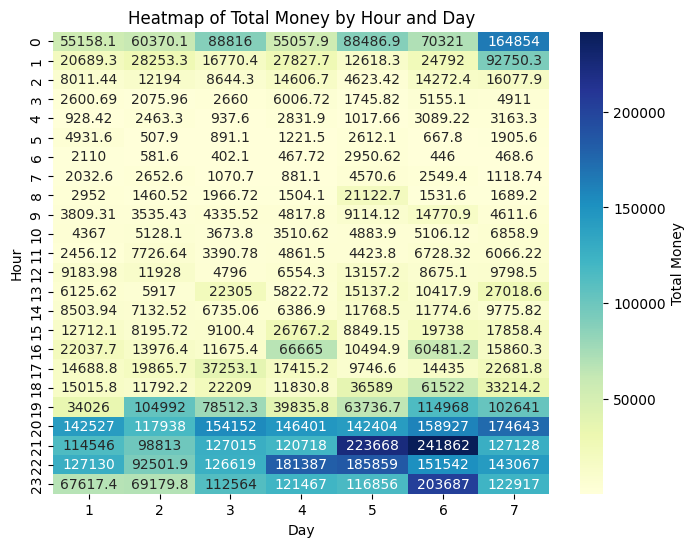

In [185]:
pivot_table = df.pivot_table(values='price', index='hour', columns='dayOfWeek', aggfunc='sum')

# Draw the heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Total Money'})
plt.title('Heatmap of Total Money by Hour and Day')
plt.xlabel('Day')
plt.ylabel('Hour')

# Show the plot
plt.show()

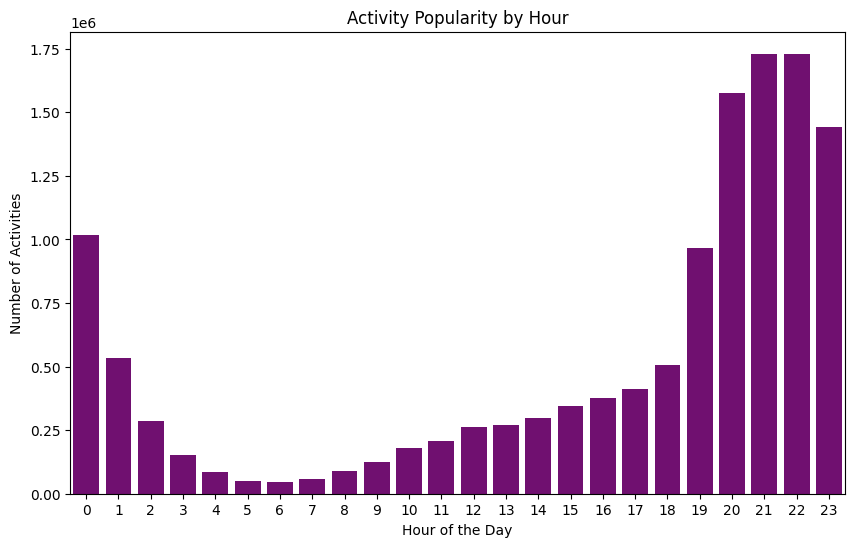

In [16]:
hour_counts = df['hour'].value_counts().sort_index()

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x=hour_counts.index, y=hour_counts.values, color='purple')

# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Activities')
plt.title('Activity Popularity by Hour')

# Optionally show the count values on top of the bars
# for index, value in enumerate(hour_counts):
#     plt.text(index, value, str(value), ha='center', va='bottom')

# Show the plot
plt.show()

### 真白花音

In [17]:
df.head()

,cUid,cUname,cParentArea,cArea,type,sendDate,message,price,count,uid,time,hour,day,dayOfWeek,year
0,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319912043,wow有舰长,NaN,NaN,0,2023-07-03 01:45:12.043,1,3,1,2023
1,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319960241,[https://i0.hdslb.com/bfs/live/abedc05607b70a8...,NaN,NaN,0,2023-07-03 01:46:00.241,1,3,1,2023
2,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320090560,点播 触电,NaN,NaN,0,2023-07-03 01:48:10.560,1,3,1,2023
3,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320127436,[https://i0.hdslb.com/bfs/live/752c09547574aeb...,NaN,NaN,0,2023-07-03 01:48:47.436,1,3,1,2023
4,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320381467,有睫毛刷嘛,NaN,NaN,0,2023-07-03 01:53:01.467,1,3,1,2023


In [18]:
specific_cname = '眞白花音_Official'
df_specific = df[df.cUname == specific_cname]
df_specific.head()

,cUid,cUname,cParentArea,cArea,type,sendDate,message,price,count,uid,time,hour,day,dayOfWeek,year
5177,401480763,眞白花音_Official,NaN,NaN,4,1660055037678,NaN,NaN,NaN,101,2022-08-09 22:23:57.678,22,9,2,2022
11790,401480763,眞白花音_Official,NaN,NaN,4,1660491113791,NaN,NaN,NaN,115,2022-08-14 23:31:53.791,23,14,7,2022
11812,401480763,眞白花音_Official,NaN,NaN,4,1659706980152,NaN,NaN,NaN,115,2022-08-05 21:43:00.152,21,5,5,2022
13748,401480763,眞白花音_Official,NaN,NaN,0,1620233401000,草,NaN,NaN,115,2021-05-06 00:50:01.000,0,6,4,2021
13749,401480763,眞白花音_Official,NaN,NaN,0,1620233446000,草,NaN,NaN,115,2021-05-06 00:50:46.000,0,6,4,2021


In [19]:
data = df_specific['type'].value_counts()
data.sort_index(inplace=True)
data.drop(9, inplace=True)
index = ['弹幕','礼物','舰长','超级弹幕','进场信息']
data.index = index
fig = px.funnel(data.sort_values(ascending=False), title="Analyse of: " + specific_cname)
fig.show()

In [31]:
users = df_specific.uid.value_counts()
users_df = users.to_frame().rename(columns={'uid': 'number'})
users_df.head()

,number
908,185268
207453,31499
200034,9160
100594,3907
208281,2926


In [127]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import numpy as np

tokenizer = AutoTokenizer.from_pretrained("techthiyanes/chinese_sentiment")
model = AutoModelForSequenceClassification.from_pretrained("techthiyanes/chinese_sentiment")
device = "cuda:0" if torch.cuda.is_available() else "cpu"
model = model.to(device)

In [125]:
inputs = tokenizer(text=["真的很不错","verygood"], return_tensors="pt",is_split_into_words=False, padding=True, truncation=True).to(device)

with torch.no_grad():
    logits = model(**inputs).logits

# predicted_class_ids = torch.arange(0, logits.shape[-1])[torch.sigmoid(logits).squeeze(dim=0) > 0.5]
predicted_class_id = torch.argmax(logits, dim=1)
print(logits)
print(predicted_class_id)

tensor([[-2.3106, -1.2821, -0.3190,  1.0394,  1.6060],
        [-2.7756, -1.6877,  0.3978,  2.7002,  0.9290]], device='cuda:0')
tensor([4, 3], device='cuda:0')


In [129]:
np.array(predicted_class_id.cpu())

array([4, 3], dtype=int64)

In [165]:
total_num = df.shape[0]
for i in tqdm(range(0, total_num-1024, 1024)):
    index_list = list(range(i, i+1024))
    # Randomly pick 3 elements from the list
    random_index = random.sample(index_list, 128)
    messages = [df.loc[j, 'message'] if df.iloc[j, 4] == 0 else "NAN" for j in random_index]
    inputs = tokenizer(messages, return_tensors="pt", is_split_into_words=False, padding=True, truncation=True).to(device)
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class_id = torch.argmax(logits, dim=1)
    df.loc[random_index, 'star'] = np.array(predicted_class_id.cpu()) + 1

df.to_csv('merged_data_with_star.csv', index=False)

In [168]:
stars = df.star.dropna()
stars.

0           5.0
1           2.0
2           4.0
3           3.0
4           2.0
           ... 
12748827    4.0
12748828    4.0
12748829    4.0
12748830    4.0
12748831    4.0
Name: star, Length: 2823397, dtype: float64

<AxesSubplot:>

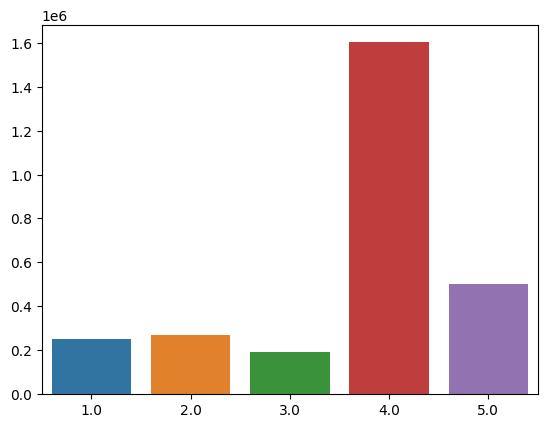

In [173]:
stars.value_counts()
sns.barplot(x=stars.value_counts().index, y=stars.value_counts().values)

In [145]:
predicted_class_id

tensor([3, 4, 3,  ..., 3, 3, 3], device='cuda:0')

### 用户分类

In [174]:
df.head()

,cUid,cUname,cParentArea,cArea,type,sendDate,message,price,count,uid,time,hour,day,dayOfWeek,year,star
0,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319912043,wow有舰长,NaN,NaN,0,2023-07-03 01:45:12.043,1,3,1,2023,5.0
1,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688319960241,[https://i0.hdslb.com/bfs/live/abedc05607b70a8...,NaN,NaN,0,2023-07-03 01:46:00.241,1,3,1,2023,2.0
2,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320090560,点播 触电,NaN,NaN,0,2023-07-03 01:48:10.560,1,3,1,2023,4.0
3,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320127436,[https://i0.hdslb.com/bfs/live/752c09547574aeb...,NaN,NaN,0,2023-07-03 01:48:47.436,1,3,1,2023,3.0
4,26406210,Cheery夏天,虚拟主播,虚拟声优,0,1688320381467,有睫毛刷嘛,NaN,NaN,0,2023-07-03 01:53:01.467,1,3,1,2023,2.0


In [5]:
df_classification = df.copy()
df_classification['cParentArea'] = pd.factorize(df['cParentArea'])[0] + 1
# df_classification['cUname'] = pd.factorize(df['cUname'])[0] + 1
df_classification['cArea'] = pd.factorize(df['cArea'])[0] + 1
df_classification = df_classification[["cArea", "type", "price", "uid", "hour", "dayOfWeek", "year", "star"]]

In [6]:
df_classification.head()

,cArea,type,price,uid,hour,dayOfWeek,year,star
0,1,0,NaN,0,1,1,2023,5.0
1,1,0,NaN,0,1,1,2023,2.0
2,1,0,NaN,0,1,1,2023,4.0
3,1,0,NaN,0,1,1,2023,3.0
4,1,0,NaN,0,1,1,2023,2.0


In [6]:
df_classification_danmu = df_classification[df_classification['type'] == 0]
df_classification_danmu = df_classification_danmu[["cArea", "uid"]]
df_danmu_encoded = pd.get_dummies(df_classification_danmu, columns=['cArea'], prefix=['cArea'])
df_danmu_encoded.fillna(0, inplace=True)
df_danmu_encoded.head()

,uid,cArea_0,cArea_1,cArea_2,cArea_3,cArea_4,cArea_5,cArea_6,cArea_7,cArea_8,...,cArea_319,cArea_320,cArea_322,cArea_325,cArea_326,cArea_327,cArea_330,cArea_335,cArea_336,cArea_344
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_uid = df_danmu_encoded.groupby("uid")[df_danmu_encoded.columns.values[1:]].sum()

MemoryError: Unable to allocate 15.7 GiB for an array with shape (6831067, 309) and data type uint64

In [22]:
df_uid

,cArea_0,cArea_1,cArea_2,cArea_3,cArea_4,cArea_5,cArea_6,cArea_7,cArea_8,cArea_9,...,cArea_319,cArea_320,cArea_322,cArea_325,cArea_326,cArea_327,cArea_330,cArea_335,cArea_336,cArea_344
uid,,,,,,,,,,,,,,,,,,,,,
0,0,1256,4,632,848,16,982,2728,288,60,...,0,0,0,0,0,0,0,0,0,0
2,428,0,0,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,250,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600039818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
690797546,288,0,0,0,0,714,14,0,0,0,...,0,0,0,0,0,0,0,0,0,0
700000020,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
columns=df_uid.columns.tolist()
cols = columns
cols

['cArea_0',
 'cArea_1',
 'cArea_2',
 'cArea_3',
 'cArea_4',
 'cArea_5',
 'cArea_6',
 'cArea_7',
 'cArea_8',
 'cArea_9',
 'cArea_10',
 'cArea_11',
 'cArea_12',
 'cArea_13',
 'cArea_14',
 'cArea_15',
 'cArea_16',
 'cArea_17',
 'cArea_18',
 'cArea_19',
 'cArea_20',
 'cArea_21',
 'cArea_22',
 'cArea_23',
 'cArea_24',
 'cArea_25',
 'cArea_26',
 'cArea_27',
 'cArea_28',
 'cArea_29',
 'cArea_30',
 'cArea_31',
 'cArea_32',
 'cArea_33',
 'cArea_34',
 'cArea_35',
 'cArea_36',
 'cArea_37',
 'cArea_38',
 'cArea_39',
 'cArea_40',
 'cArea_41',
 'cArea_42',
 'cArea_43',
 'cArea_44',
 'cArea_45',
 'cArea_46',
 'cArea_47',
 'cArea_48',
 'cArea_49',
 'cArea_50',
 'cArea_51',
 'cArea_52',
 'cArea_53',
 'cArea_54',
 'cArea_55',
 'cArea_56',
 'cArea_57',
 'cArea_58',
 'cArea_59',
 'cArea_60',
 'cArea_61',
 'cArea_62',
 'cArea_63',
 'cArea_64',
 'cArea_65',
 'cArea_67',
 'cArea_68',
 'cArea_69',
 'cArea_70',
 'cArea_71',
 'cArea_72',
 'cArea_73',
 'cArea_74',
 'cArea_75',
 'cArea_76',
 'cArea_77',
 'cArea_7

In [24]:
normalized_df = preprocessing.normalize(df_uid, norm='l2')

In [25]:
df_uid = pd.DataFrame(normalized_df, columns = cols)
df_uid

,cArea_0,cArea_1,cArea_2,cArea_3,cArea_4,cArea_5,cArea_6,cArea_7,cArea_8,cArea_9,...,cArea_319,cArea_320,cArea_322,cArea_325,cArea_326,cArea_327,cArea_330,cArea_335,cArea_336,cArea_344
0,0.000000,0.354113,0.001128,0.178184,0.239083,0.004511,0.276862,0.769125,0.081198,0.016916,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.995230,0.000000,0.000000,0.037205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.208514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.995045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16038,0.372398,0.000000,0.000000,0.000000,0.000000,0.923236,0.018103,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16039,0.997268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.cluster import KMeans
est = KMeans(n_clusters=10, random_state=4444).fit(df_uid)

d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
df_uid['cluster'] = est.labels_
df_uid.head()

,cArea_0,cArea_1,cArea_2,cArea_3,cArea_4,cArea_5,cArea_6,cArea_7,cArea_8,cArea_9,...,cArea_320,cArea_322,cArea_325,cArea_326,cArea_327,cArea_330,cArea_335,cArea_336,cArea_344,cluster
0,0.000000,0.354113,0.001128,0.178184,0.239083,0.004511,0.276862,0.769125,0.081198,0.016916,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.995230,0.000000,0.000000,0.037205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.208514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.995045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [28]:
df_uid.cluster.value_counts()

1    6122
0    4735
9     830
2     798
3     781
7     744
5     677
8     656
4     497
6     202
Name: cluster, dtype: int64

In [35]:
value_counts = df_uid.cluster.value_counts()
percentage_values = (value_counts / 16037) * 100
for value, count in value_counts.items():
    percentage = percentage_values[value]
    print(f"{percentage:.2f}%")

38.17%
29.53%
5.18%
4.98%
4.87%
4.64%
4.22%
4.09%
3.10%
1.26%


In [8]:
percentages = list(value_counts)
labels = ['虚拟主播', '网游', '娱乐', '手游','电台','赛事','生活','知识','单机游戏','大事件']
# 绘制饼状图
plt.figure(figsize=(8, 8))  # 可选：设置图形大小
pie_chart = plt.pie(percentages, labels=labels, autopct='%.2f%%', startangle=90)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.axis('equal')  # 让饼状图保持圆形
# plt.title('Pie Chart')  # 可选：设置图形标题
plt.setp(pie_chart[1], fontproperties=chinese_font)
# 显示图形
plt.show()


NameError: name 'value_counts' is not defined

### 付费用户

In [8]:
df_uid_price = df[["uid", "message"]]
df_uid_price.fillna(0, inplace=True)
df_uid_price = df_uid_price.groupby('uid')['message'].sum()
df_uid_price.head()

C:\Users\Eason\AppData\Local\Temp\ipykernel_39872\1050535764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uid_price.fillna(0, inplace=True)


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [102]:
df_uid_price.value_counts()

0.00         29081
1.00           602
0.10           351
2.00           190
3.00           108
             ...  
102.40           1
240.80           1
4016.00          1
122.92           1
187867.00        1
Name: price, Length: 1708, dtype: int64

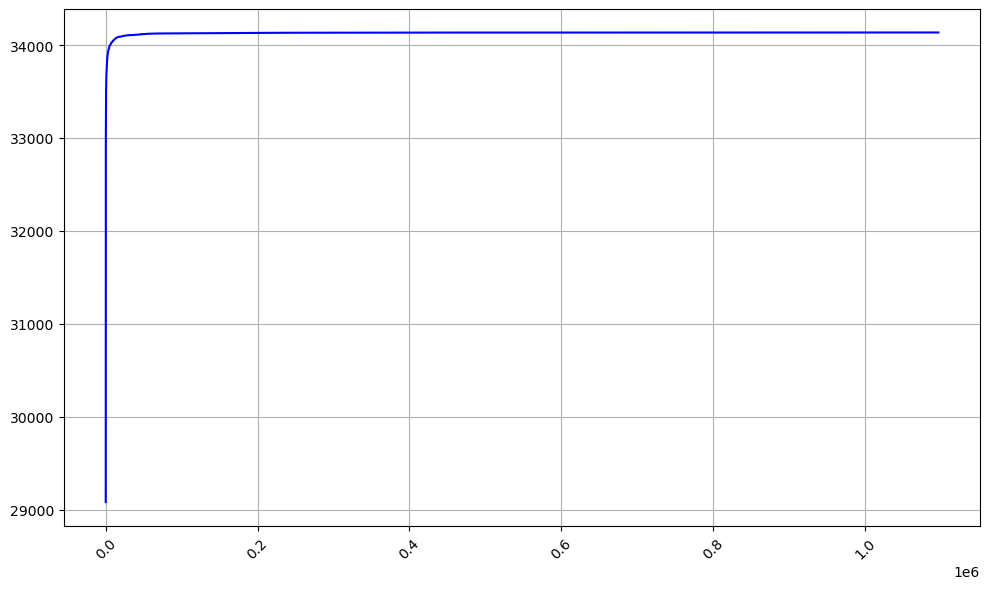

In [103]:
cumulative_sum = df_uid_price.value_counts().sort_index()[0:].cumsum()
# Plot the cumulative graph
plt.figure(figsize=(10, 6))
plt.plot(cumulative_sum.index.values, cumulative_sum.values, color='b')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


In [104]:
threshold = 100
uid_qualified = df_uid_price[df_uid_price > threshold].index.values
df_classification = df.copy()
df_classification = df_classification[df_classification['uid'].isin(uid_qualified)]
df_classification['cParentArea'] = pd.factorize(df_classification['cParentArea'])[0] + 1
# df_classification['cUname'] = pd.factorize(df['cUname'])[0] + 1
df_classification['cArea'] = pd.factorize(df_classification['cArea'])[0] + 1
df_classification = df_classification[["cArea", "type", "price", "uid", "hour", "dayOfWeek", "year", "star"]]

In [105]:
def compute_percentage(row):
    total = row.sum()
    return (row / total) * 100

# Apply the percentage computation function to each row using 'apply' with axis=1
percentage_df = df_uid.apply(compute_percentage, axis=1)

In [106]:
est = KMeans(n_clusters=10, random_state=4444).fit(percentage_df)

d:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [107]:
percentage_df['cluster'] = est.labels_
percentage_df.head()

,cArea_0,cArea_1,cArea_2,cArea_3,cArea_4,cArea_5,cArea_6,cArea_7,cArea_8,cArea_9,...,cArea_320,cArea_322,cArea_325,cArea_326,cArea_327,cArea_330,cArea_335,cArea_336,cArea_344,cluster
0,0.000000,15.287244,0.048685,7.692308,10.321324,0.194742,11.952288,33.203505,3.505355,0.730282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
1,44.861326,0.000000,0.000000,1.677059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,5.578802,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,43.917829,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [108]:
percentage_df.cluster.value_counts()

1    5053
0    4071
9    3833
3    2183
4     201
7     196
8     170
6     127
2     113
5      95
Name: cluster, dtype: int64

In [109]:
value_counts = percentage_df.cluster.value_counts()
percentage_values = (value_counts / 16037) * 100
for value, count in value_counts.items():
    percentage = percentage_values[value]
    print(f"{percentage:.2f}%")

31.51%
25.39%
23.90%
13.61%
1.25%
1.22%
1.06%
0.79%
0.70%
0.59%


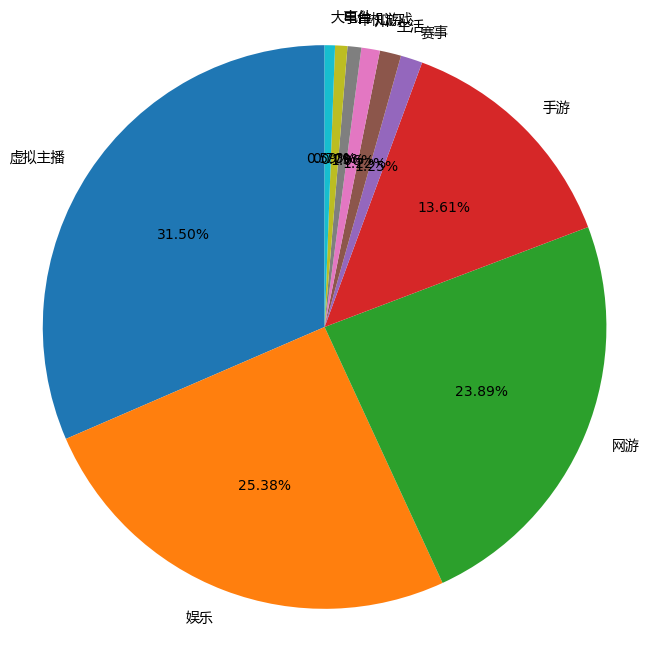

In [114]:
percentages = list(value_counts)
labels = ['虚拟主播','娱乐', '网游','手游','赛事','生活','知识','单机游戏','电台','大事件']
# 绘制饼状图
plt.figure(figsize=(8, 8))  # 可选：设置图形大小
pie_chart = plt.pie(percentages, labels=labels, autopct='%.2f%%', startangle=90)

plt.axis('equal')  # 让饼状图保持圆形
# plt.title('Pie Chart')  # 可选：设置图形标题
plt.setp(pie_chart[1], fontproperties=chinese_font)
# 显示图形
plt.show()
